In [1]:
from surprise import Dataset
from surprise import Reader

from collections import defaultdict
import numpy as np
import pandas as pd
movies=pd.read_csv("movies.csv")
ratings=pd.read_csv("ratings.csv")

In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
movie_ratings = pd.merge(movies, ratings, left_on='movieId', right_on='movieId')
movie_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


movies.shape
#(9125, 3)

ratings.shape
#(100004,4)

movies_ratings.shape
#(100004,6)

In [5]:
movie_ratings["movieId"].nunique()
#9066
#movies를 보면 9125개가 있는데 movie_ratings에는 9066개 있음
#약 60개정도가 ratings가 없는 movie존재했다는 것

9066

In [6]:
#영화를 중심으로 평점을 보기 위한 데이터 프레임 생성
movie_rating_summary = movie_ratings[["movieId", "rating"]].groupby(["movieId"]).agg(["count", "median", "mean"])

movie_rating_summary.head()

rating                 
         count median      mean
movieId                        
1          247    4.0  3.872470
2          107    3.0  3.401869
3           59    3.0  3.161017
4           13    3.0  2.384615
5           56    3.0  3.267857

In [7]:
movie_rating_summary.columns
#MultiIndex([('ratings','count'),('ratings','median'),('ratings','mean')],)
#인덱스 이름이 ratings->count, ratings->median, ratings->mean이런 식으로 멀티 인덱스되어있음

#간단하게 count, meadian, mean으로 바꾸기
movie_rating_summary.columns = ["count", "median", "mean"]
movie_rating_summary.columns
#Index(['count', 'median', 'mean'], dtype='object')

Index(['count', 'median', 'mean'], dtype='object')

In [8]:
#가장 많은 평점을 받은 영화 Top10
movie_rating_summary.sort_values("count", ascending=False).head(10)

,count,median,mean
movieId,,,
356,341,4.0,4.054252
296,324,4.5,4.256173
318,311,5.0,4.487138
593,304,4.0,4.138158
260,291,4.5,4.221649
480,274,4.0,3.706204
2571,259,4.5,4.183398
1,247,4.0,3.872470
527,244,4.5,4.303279


In [9]:
#평점의 평균이 높은 순으로 영화 10개 출력
#but!출력물을 보면 알 수 있겠지만 이렇게하면 평점을 1개만 받았는데 5점이라서 출력되는 결과 발생
movie_rating_summary.sort_values("mean", ascending=False).head(10)

,count,median,mean
movieId,,,
163949,1,5.0,5.0
71180,1,5.0,5.0
51471,1,5.0,5.0
52617,1,5.0,5.0
53887,1,5.0,5.0
54251,1,5.0,5.0
54328,1,5.0,5.0
55555,1,5.0,5.0
56869,1,5.0,5.0


In [10]:
#위의 문제를 해결하기 위해 평점의 갯수가 100개 이상인 영화 중에서 평점 평균이 높은 영화 Top10출력
movie_rating_summary[movie_rating_summary["count"] > 100].sort_values("mean", ascending=False).head(10)

,count,median,mean
movieId,,,
858,200,5.00,4.487500
318,311,5.00,4.487138
1221,135,5.00,4.385185
50,201,4.50,4.370647
527,244,4.50,4.303279
1193,144,4.50,4.256944
608,224,4.50,4.256696
296,324,4.50,4.256173
2858,220,4.25,4.236364


C:\ProgramData\Anaconda3\envs\mecab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

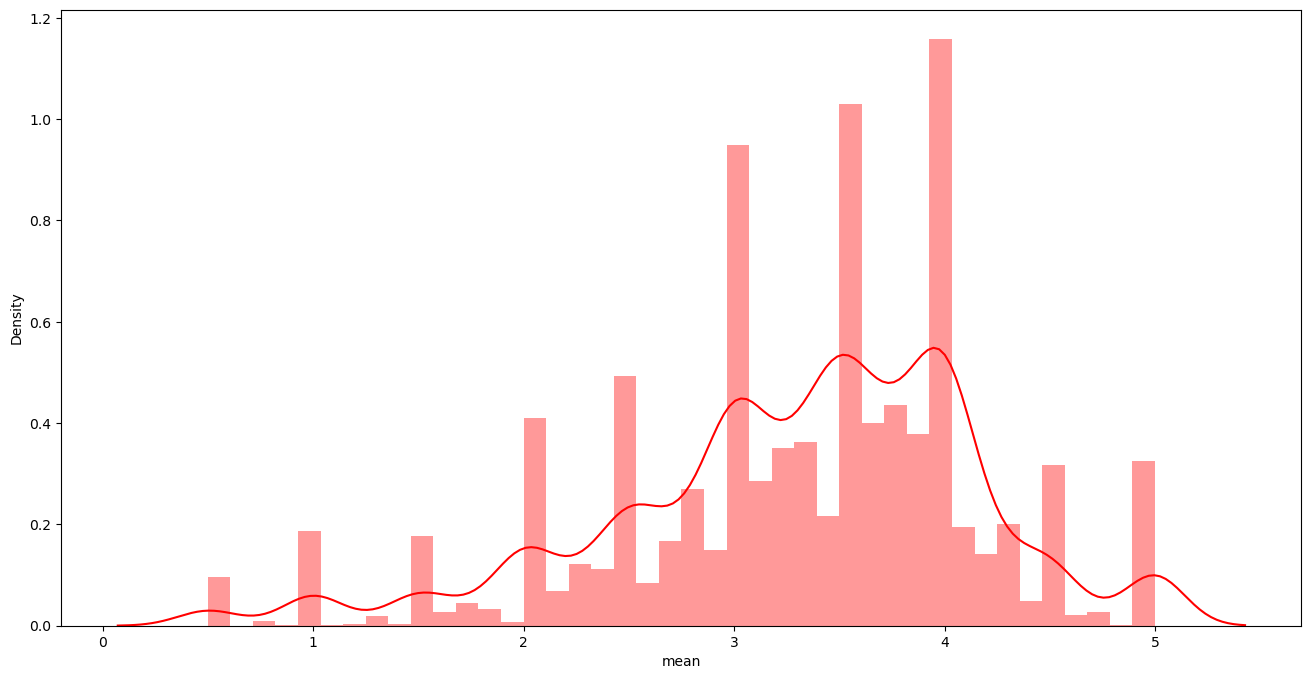

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
#movie_ratings_summary의 평균값
sns.distplot(a=movie_rating_summary['mean'], kde=True, color='r')
# 그래프가 약간 오른쪽 -> 사람들이 후하게 평점을 준다

C:\ProgramData\Anaconda3\envs\mecab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

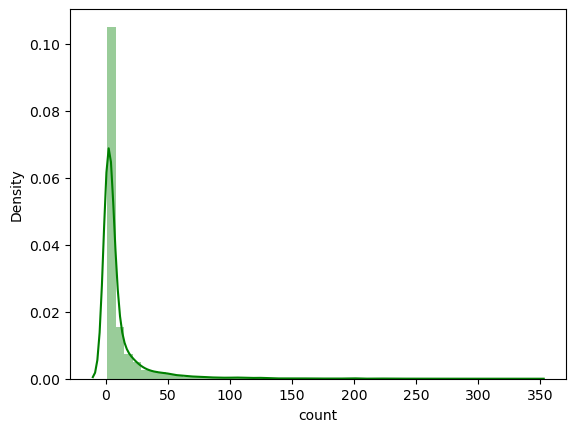

In [12]:
#영화의 평점의 수 count
sns.distplot(a=movie_rating_summary['count'], color='g')

In [13]:
#몇명의 사용자가 있는가?
movie_ratings["userId"].nunique()
#671
#즉 671명의 사용자가 9066개의 영화에 100004개의 평점을 준 것을 알 수 있음

671

In [14]:
#사용자를 중심으로 평점 정보를 보기 위한 데이터 프레임 생성
user_rating_summary = movie_ratings[["userId", "rating"]].groupby(["userId"]).agg(["count", "median", "mean"])
user_rating_summary.head()

rating                 
        count median      mean
userId                        
1          20    2.5  2.550000
2          76    3.0  3.486842
3          51    3.5  3.568627
4         204    5.0  4.348039
5         100    4.0  3.910000

In [15]:
#위에서 멀티인덱스 정리한 것처럼 인덱스 간단하게 정리
user_rating_summary.columns = ["count", "median", "mean"]

In [16]:
#가장 많이 평점을 작성한 사용자 Top10
user_rating_summary.sort_values("count", ascending=False).head(10)

,count,median,mean
userId,,,
547,2391,3.5,3.366792
564,1868,4.0,3.552463
624,1735,3.0,2.894236
15,1700,3.0,2.621765
73,1610,3.5,3.374224
452,1340,3.0,3.189179
468,1291,3.0,2.965918
380,1063,3.5,3.366416
311,1019,3.0,3.006379


In [17]:
#가장 평점을 후하게 준 사용자 Top10
user_rating_summary.sort_values("median", ascending=False).head(10)

,count,median,mean
userId,,,
230,94,5.0,4.473404
432,62,5.0,4.411290
622,31,5.0,4.725806
499,33,5.0,4.272727
145,38,5.0,4.500000
559,129,5.0,4.418605
473,76,5.0,4.315789
28,50,5.0,4.280000
556,25,5.0,4.400000


In [18]:
#가장 평점을 짜게 준 사용자 Top10
user_rating_summary.sort_values("median", ascending=True).head(10)

,count,median,mean
userId,,,
207,46,0.50,1.804348
581,49,0.50,1.459184
579,21,0.50,1.333333
609,140,1.00,1.985714
429,27,2.00,2.240741
315,55,2.00,2.454545
325,20,2.00,2.525000
35,20,2.25,2.400000
79,55,2.50,2.518182


C:\ProgramData\Anaconda3\envs\mecab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

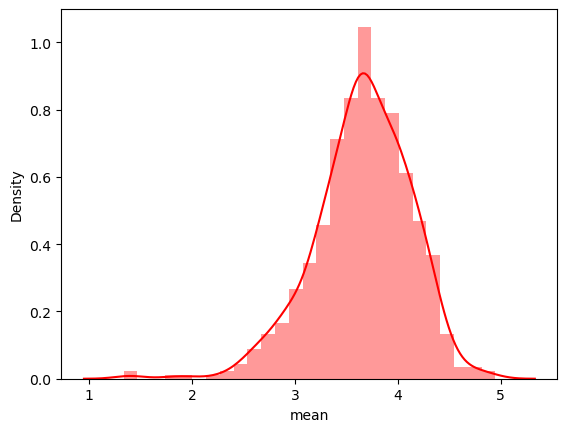

In [19]:
#평점의 평균 분포
sns.distplot(a=user_rating_summary['mean'], kde=True, color='r')

C:\ProgramData\Anaconda3\envs\mecab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

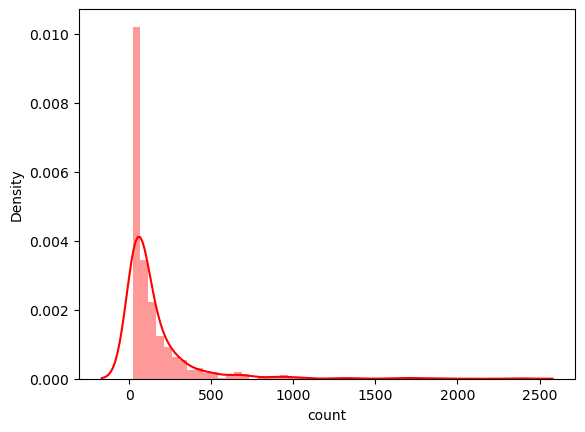

In [20]:
sns.distplot(a=user_rating_summary['count'], kde=True, color='r')
# long tail->일부의 사용자들이 많은 수의 평점을 남김

영화 데이터를 surprise 모듈을 통해 로딩

In [21]:
#movieID를 기준으로 영화의 타이틀과 장르 return
def getMovieName(movie_ratings, movieID):
    return movie_ratings[movie_ratings["movieId"] == movieID][["title", "genres"]].values[0]

#movie이름을 기준으로 영화의 ID와 장르 return
def getMovieID(movie_ratings, movieName):
    return movie_ratings[movie_ratings["title"] == movieName][["movieId", "genres"]].values[0]

In [22]:
getMovieName(movie_ratings, 79132)

array(['Inception (2010)',
       'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'], dtype=object)

In [23]:
getMovieID(movie_ratings, 'Inception (2010)')

array([79132, 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'],
      dtype=object)

In [24]:
from surprise import Dataset
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file("ratings.csv", reader=reader)


In [25]:
from surprise import KNNBasic
import heapq
from collections import defaultdict

from surprise import SVD
from surprise import NormalPredictor
from surprise.model_selection import GridSearchCV

#build_full_trainset() : train/test set으로 나누지말고 전부 train set으로
trainSet = data.build_full_trainset()

#유사도 측정함수의 속성
sim_options = {
    'name': 'cosine',	#코사인 유사도
    'user_based': True	#사용자 기반 협업 필터링
}

model = KNNBasic(sim_options=sim_options)
model.fit(trainSet)
simsMatrix = model.compute_similarities()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [26]:
testUser = '85'
k = 10

# 주어진 사용자와 가장 흡사한 사용자 N을 찾는다
# 먼저 이를 Surprise 내부 ID로 변환
testUserInnerID = trainSet.to_inner_uid(testUser)
print(testUserInnerID)
#84

# 이 사용자에 해당하는 레코드를 읽어온다
similarityRow = simsMatrix[testUserInnerID]

84


In [27]:
# users에 모든 사용자들을 일련번호와 유사도를 갖는 튜플의 형태로 저장
# 이 때 본인은 제외
users = []
for innerID, score in enumerate(similarityRow):
    if (innerID != testUserInnerID):
        users.append( (innerID, score) )

# 이제 users 리스트에서 유사도 값을 기준으로 가장 큰 k개를 찾는다
kNeighbors = heapq.nlargest(k, users, key=lambda t: t[1])

kNeighbors
'''
[(10,1.0),
 (11,1.0),
 (13,1.0),
 (24,1.0),
 (36,1.0),
 (44,1.0),
 (45,1.0),
 (51,1.0),
 (53,1.0),
 (61,1.0)]
'''
#(사용자ID, 유사도)
#즉, 85번 사용자와 100%일치하는 사용자 10명이 출력된 것

'\n[(10,1.0),\n (11,1.0),\n (13,1.0),\n (24,1.0),\n (36,1.0),\n (44,1.0),\n (45,1.0),\n (51,1.0),\n (53,1.0),\n (61,1.0)]\n'

In [28]:
# 이제 유사 사용자들을 하나씩 보면서 그들이 평가한 아이템들별로 원 사용자와 유사 사용자간의 유사도를 가중치로 준 평점을 누적한다

# candidates에는 아이템별로 점수를 누적한다. 유사사용자(u')의 평점 * 사용자(u)와 유사 사용자(u')의 유사도
candidates = defaultdict(float)

# 이 K명의 최고 유사 사용자를 한명씩 루프를 돌면서 살펴본다
for similarUser in kNeighbors:
    # similarUser는 앞서 enumerate로 만든 그 포맷임 - (내부ID, 유사도값)
    innerID = similarUser[0]
    userSimilarityScore = similarUser[1]

    # innerID에 해당하는 사용자의 아이템과 평점 정보를 읽어온다.
    # theirRatings는 (아이템ID, 평점)의 리스트임
    theirRatings = trainSet.ur[innerID]
    # innerID가 평가한 모든 아이템 리스트를 하나씩 보면서 
    # 아이템ID별로 평점 정보를 합산하되 사용자와의 유사도값을 가중치로 준다
    for rating in theirRatings:
        candidates[rating[0]] += (rating[1]) * userSimilarityScore
        
# 사용자가 이미 평가한 아이템들을 제거할 사전을 만든다
watched = {}
for itemID, rating in trainSet.ur[testUserInnerID]:
    watched[itemID] = 1

In [29]:
# 앞서 candidates에서 합산된 스코어를 기준으로 내림차순으로 소팅한 후
# 사용자(u)가 아직 못본 아이템인 경우 추천한다
pos = 0
for itemID, ratingSum in sorted(candidates.items(), key=lambda k: k[1], reverse=True):
    if not itemID in watched:
        movieID = trainSet.to_raw_iid(itemID)
        print(movieID, getMovieName(movie_ratings, int(movieID)), ratingSum)
        pos += 1
        if (pos > 10):
            break

79132 ['Inception (2010)' 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'] 16.5
1196 ['Star Wars: Episode V - The Empire Strikes Back (1980)'
 'Action|Adventure|Sci-Fi'] 12.0
26614 ['Bourne Identity, The (1988)' 'Action|Adventure|Drama|Mystery|Thriller'] 10.0
3996 ['Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)'
 'Action|Drama|Romance'] 10.0
58559 ['Dark Knight, The (2008)' 'Action|Crime|Drama|IMAX'] 10.0
1201 ['Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)'
 'Action|Adventure|Western'] 9.5
48516 ['Departed, The (2006)' 'Crime|Drama|Thriller'] 9.5
91529 ['Dark Knight Rises, The (2012)' 'Action|Adventure|Crime|IMAX'] 9.5
1270 ['Back to the Future (1985)' 'Adventure|Comedy|Sci-Fi'] 9.5
104841 ['Gravity (2013)' 'Action|Sci-Fi|IMAX'] 9.0
2959 ['Fight Club (1999)' 'Action|Crime|Drama|Thriller'] 9.0


In [30]:
#앞의 testUser = '85'부터 코드를 함수로 만든 것
def recommendForUser(userID):
    testUserInnerID = trainSet.to_inner_uid(userID)
    similarityRow = simsMatrix[testUserInnerID]

    users = []
    for innerID, score in enumerate(similarityRow):
        if (innerID != testUserInnerID):
            users.append( (innerID, score) )

    kNeighbors = heapq.nlargest(k, users, key=lambda t: t[1])

    candidates = defaultdict(float)
    for similarUser in kNeighbors:
        innerID = similarUser[0]
        userSimilarityScore = similarUser[1]
        theirRatings = trainSet.ur[innerID]
        for rating in theirRatings:
            candidates[rating[0]] += (rating[1]) * userSimilarityScore

    watched = {}
    for itemID, rating in trainSet.ur[testUserInnerID]:
        watched[itemID] = 1

    pos = 0
    for itemID, ratingSum in sorted(candidates.items(), key=lambda k: k[1], reverse=True):
        if not itemID in watched:
            movieID = trainSet.to_raw_iid(itemID)
            print(movieID, getMovieName(movie_ratings, int(movieID)), ratingSum)
            pos += 1
            if (pos > 10):
                break

recommendForUser('85')

79132 ['Inception (2010)' 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX'] 16.5
1196 ['Star Wars: Episode V - The Empire Strikes Back (1980)'
 'Action|Adventure|Sci-Fi'] 12.0
26614 ['Bourne Identity, The (1988)' 'Action|Adventure|Drama|Mystery|Thriller'] 10.0
3996 ['Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)'
 'Action|Drama|Romance'] 10.0
58559 ['Dark Knight, The (2008)' 'Action|Crime|Drama|IMAX'] 10.0
1201 ['Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)'
 'Action|Adventure|Western'] 9.5
48516 ['Departed, The (2006)' 'Crime|Drama|Thriller'] 9.5
91529 ['Dark Knight Rises, The (2012)' 'Action|Adventure|Crime|IMAX'] 9.5
1270 ['Back to the Future (1985)' 'Adventure|Comedy|Sci-Fi'] 9.5
104841 ['Gravity (2013)' 'Action|Sci-Fi|IMAX'] 9.0
2959 ['Fight Club (1999)' 'Action|Crime|Drama|Thriller'] 9.0
